In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import torch.nn.functional as F




/home/rhythm/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
stock_market = pd.read_excel('./nvda-stockmarket.xlsx',engine='openpyxl')

In [3]:
stock_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Contract Name          353 non-null    object        
 1   Last Trade Date (EDT)  353 non-null    datetime64[ns]
 2   Strike                 353 non-null    float64       
 3   Last Price             353 non-null    float64       
 4   Bid                    353 non-null    float64       
 5   Ask                    353 non-null    float64       
 6   Change                 353 non-null    float64       
 7   % Change               353 non-null    float64       
 8   Volume                 353 non-null    object        
 9   Open Interest          353 non-null    int64         
 10  Implied Volatility     353 non-null    float64       
 11  Option Type            353 non-null    object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(3)
memory usa

In [5]:
new_column_names = {
    '% Change': 'dChange',
    
}

stock_market.rename(columns=new_column_names, inplace=True)



In [6]:
#stock market date time to date time
stock_market['Date'] = stock_market['Last Trade Date (EDT)'].dt.date

In [7]:
stock_market['Time'] = stock_market['Last Trade Date (EDT)'].dt.time

In [7]:
stock_market.head()

,Contract Name,Last Trade Date (EDT),Strike,Last Price,Bid,Ask,Change,dChange,Volume,Open Interest,Implied Volatility,Option Type,Date,Time
0,NVDA240301C00250000,2024-02-27 20:31:00,250.0,540.03,533.55,535.4,0.0,0.0,9,31,6.1533,call,2024-02-27,20:31:00
1,NVDA240301C00260000,2024-02-26 20:59:00,260.0,531.66,523.95,525.4,0.0,0.0,3,12,6.0527,call,2024-02-26,20:59:00
2,NVDA240301C00270000,2024-02-26 20:13:00,270.0,523.00,513.55,515.4,0.0,0.0,28,16,5.7617,call,2024-02-26,20:13:00
3,NVDA240301C00280000,2024-02-22 18:03:00,280.0,495.19,504.00,505.8,0.0,0.0,1,16,5.7690,call,2024-02-22,18:03:00
4,NVDA240301C00290000,2024-02-26 20:02:00,290.0,500.59,494.15,495.7,0.0,0.0,30,2,5.5967,call,2024-02-26,20:02:00


In [8]:
stock_market = stock_market.drop(['Contract Name','Last Trade Date (EDT)','Date', 'Time'], axis = 1)

In [9]:
# Replace '-' with NaN and convert to numeric
stock_market['Volume'] = pd.to_numeric(stock_market['Volume'], errors='coerce')

# Drop NaN values if needed
# df.dropna(subset=['Volume'], inplace=True)

# Convert to integer
stock_market['Volume'] = stock_market['Volume'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

There are 4-54 nAN values in volume, Let's get rid of these

In [10]:
stock_market['Volume'].isna().sum()

4

In [11]:
stock_market = stock_market.dropna()

In [12]:
stock_market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 352
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Strike              349 non-null    float64
 1   Last Price          349 non-null    float64
 2   Bid                 349 non-null    float64
 3   Ask                 349 non-null    float64
 4   Change              349 non-null    float64
 5   dChange             349 non-null    float64
 6   Volume              349 non-null    float64
 7   Open Interest       349 non-null    int64  
 8   Implied Volatility  349 non-null    float64
 9   Option Type         349 non-null    object 
dtypes: float64(8), int64(1), object(1)
memory usage: 30.0+ KB


# EDA 

### checking for NANs

In [ ]:
stockMarket.isna().sum()

Contract Name         0
Strike                0
Last Price            0
Bid                   0
Ask                   0
Change                0
% Change              0
Volume                0
Open Interest         0
Implied Volatility    0
Option Type           0
Date                  0
Time                  0
dtype: int64

In [37]:
df.describe()

,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,349.000000,353.000000,353.000000
mean,725.750708,110.142096,111.235467,112.598244,-1.214136,-0.053412,1142.690544,1511.569405,1.443579
std,266.239402,153.369613,154.211363,155.587459,4.186927,0.237244,3772.058173,2520.052099,1.221472
min,250.000000,0.010000,0.000000,0.000000,-20.890000,-0.542700,1.000000,0.000000,0.000000
25%,515.000000,0.020000,0.010000,0.020000,-0.200000,-0.078300,3.000000,31.000000,0.599600
50%,700.000000,6.450000,6.400000,6.550000,0.000000,0.000000,20.000000,526.000000,1.062500
75%,910.000000,203.830000,201.100000,204.850000,0.000000,0.000000,254.000000,1872.000000,1.869100
max,1300.000000,540.030000,533.550000,535.400000,19.750000,2.000000,31663.000000,18384.000000,6.153300


In [14]:
print(f'Number of calls and Puts : {stock_market["Option Type"].value_counts()}')

Number of calls and Puts : call    180
Puts    169
Name: Option Type, dtype: int64


if buying a call then betting that it will go up
if put then will go down

In [ ]:
print(f'Number of trades made for March 1 as time of expiration  : {stockMarket["Date"].value_counts().sort_index(ascending=True)}')

Number of trades made for March 1 as time of expiration  : Date
2024-01-25      2
2024-01-26      1
2024-01-29      1
2024-02-01      1
2024-02-06      1
2024-02-07      1
2024-02-14      3
2024-02-16      1
2024-02-20      3
2024-02-21      1
2024-02-22     28
2024-02-23     11
2024-02-26     47
2024-02-27     43
2024-02-28    209
Name: count, dtype: int64


In [ ]:
import plotly.express as px
date_counts_increasing = stockMarket["Date"].value_counts().sort_index(ascending=True)

# Now, date_counts_increasing.index and date_counts_increasing.values can be obtained as follows:
date_index = date_counts_increasing.index
counts_values = date_counts_increasing.values

# Assuming you have date_counts_increasing or date_counts_decreasing as a pandas Series
fig = px.bar(x=date_counts_increasing.index, y=date_counts_increasing.values,
             labels={'x': 'Date', 'y': 'Number of Trades'},
             title='Number of Trades by Date (Increasing Order)')

# To display the plot as an interactive HTML file
fig.write_html('trades_by_date_increasing.html')

# To display the plot in a Jupyter notebook (if using Jupyter)
#fig.show()


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
from datetime import datetime

# Convert 'Option Type' to numerical labels
label_encoder = LabelEncoder()

stock_market['Option Type'] = label_encoder.fit_transform(stock_market['Option Type'])

# Separate features and target
y = stock_market['Option Type']
X = stock_market.drop('Option Type', axis = 1)


In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 352
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Strike              349 non-null    float64
 1   Last Price          349 non-null    float64
 2   Bid                 349 non-null    float64
 3   Ask                 349 non-null    float64
 4   Change              349 non-null    float64
 5   dChange             349 non-null    float64
 6   Volume              349 non-null    float64
 7   Open Interest       349 non-null    int64  
 8   Implied Volatility  349 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 27.3 KB


In [16]:
X.shape, y.shape

((349, 9), (349,))

In [14]:
# Turninig Data to Tensor 
X = torch.from_numpy(X.values).type(torch.float)
y = torch.from_numpy(y.values).type(torch.float)

1. input layer shape = # of features
2. Output Layer shape = 1(one class or the other) for multiclassificatin = 3 
3. Hidden Layer Activation usually ReLu could use other too
4. Output activation Sigmoid, Softmax for multiclass
5. Loss Function Binary CrossEntropy
6. Optimizer = SGD, Adan

In [15]:
## Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
X_train.info()

AttributeError: 'Tensor' object has no attribute 'info'

In [62]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Define the neural network model
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=9, out_features=6) # takes in 11 features (X), produces 6 features
        self.layer_2 = nn.Linear(in_features=6, out_features=1) # takes in 6 features, produces 1 feature (y)
    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = BinaryClassifier()
model_0


BinaryClassifier(
  (layer_1): Linear(in_features=9, out_features=6, bias=True)
  (layer_2): Linear(in_features=6, out_features=1, bias=True)
)

In [54]:
# Make predictions with the model
untrained_preds = model_0(X_test)
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 70, Shape: torch.Size([70, 1])
Length of test samples: 70, Shape: torch.Size([70])

First 10 predictions:
tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 0., 0., 1., 0., 0., 0., 0., 0.])


In [19]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=deep.parameters(), 
                            lr=0.001)

In [21]:
# Check for NaN values
has_nan = torch.isnan(X_train).any().item()
if has_nan:
    print("The tensor contains NaN values.")
else:
    print("The tensor does not contain NaN values.")


The tensor does not contain NaN values.


### Training and building 

In [30]:
import torch
import torch.nn as nn
from torch.optim import SGD

torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze()
    # Squeeze to remove extra `1` dimensions; this won't work unless model and data are on the same device 
    y_pred = torch.round(torch.sigmoid(y_logits))  # Turn logits -> pred probs -> pred labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.no_grad():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # 2. Calculate loss/accuracy
        test_loss = loss_fn(test_logits, y_test)
    
    # Print out what's happening every epoch
    print(f"Epoch: {epoch} | Loss: {loss.item():.5f} | Test loss: {test_loss.item():.5f}")

     # Print intermediate values for debugging
    #print("y_pred:", y_pred)
    #print("y_logits:", y_logits)
    #print("test_pred:", test_pred)
    #print("test_logits:", test_logits)

    # Check for NaN or infinite values in tensors
    if torch.isnan(loss) or torch.isinf(loss):
        print("Training loss is NaN or infinite. Exiting training loop.")
        break


Epoch: 0 | Loss: 143.59129 | Test loss: 341.18546
Epoch: 1 | Loss: 242.75963 | Test loss: 29.29285
Epoch: 2 | Loss: 19.02667 | Test loss: 18.66355
Epoch: 3 | Loss: 13.87927 | Test loss: 57.40464
Epoch: 4 | Loss: 35.56451 | Test loss: 11.54196
Epoch: 5 | Loss: 6.53236 | Test loss: 28.11400
Epoch: 6 | Loss: 19.98043 | Test loss: 27.34684
Epoch: 7 | Loss: 17.10603 | Test loss: 2.74864
Epoch: 8 | Loss: 2.06041 | Test loss: 18.74428
Epoch: 9 | Loss: 11.44220 | Test loss: 11.97199
Epoch: 10 | Loss: 7.33447 | Test loss: 2.18331
Epoch: 11 | Loss: 1.85456 | Test loss: 11.59234
Epoch: 12 | Loss: 7.02199 | Test loss: 4.17031
Epoch: 13 | Loss: 2.74874 | Test loss: 15.72265
Epoch: 14 | Loss: 13.79070 | Test loss: 13.57867
Epoch: 15 | Loss: 9.61518 | Test loss: 1.98614
Epoch: 16 | Loss: 2.04755 | Test loss: 13.15585
Epoch: 17 | Loss: 9.90176 | Test loss: 1.32624
Epoch: 18 | Loss: 1.16874 | Test loss: 7.48221
Epoch: 19 | Loss: 6.72798 | Test loss: 7.49547
Epoch: 20 | Loss: 5.62586 | Test loss: 1.6965

Epoch: 21 | Loss: 1.50288 | Test loss: 6.06568
Epoch: 22 | Loss: 4.31421 | Test loss: 3.06850
Epoch: 23 | Loss: 2.46807 | Test loss: 4.21129
Epoch: 24 | Loss: 3.54466 | Test loss: 3.75095
Epoch: 25 | Loss: 3.18610 | Test loss: 5.43813
Epoch: 26 | Loss: 4.43060 | Test loss: 1.05594
Epoch: 27 | Loss: 1.01376 | Test loss: 1.16590
Epoch: 28 | Loss: 0.98542 | Test loss: 1.51749
Epoch: 29 | Loss: 1.10727 | Test loss: 1.46089
Epoch: 30 | Loss: 1.48498 | Test loss: 2.48416
Epoch: 31 | Loss: 2.37024 | Test loss: 4.04444
Epoch: 32 | Loss: 3.27785 | Test loss: 0.72790
Epoch: 33 | Loss: 0.80031 | Test loss: 2.22055
Epoch: 34 | Loss: 1.75533 | Test loss: 1.56449
Epoch: 35 | Loss: 1.58086 | Test loss: 3.21894
Epoch: 36 | Loss: 2.65339 | Test loss: 0.94416
Epoch: 37 | Loss: 0.86329 | Test loss: 1.32623
Epoch: 38 | Loss: 1.26197 | Test loss: 2.19965
Epoch: 39 | Loss: 1.94935 | Test loss: 0.75794
Epoch: 40 | Loss: 0.75120 | Test loss: 0.99759
Epoch: 41 | Loss: 0.95803 | Test loss: 1.65659
Epoch: 42 | L

changing the model and making it denser
2. Plot the losses and. 

In [17]:


class DeeperBinaryClassifier(nn.Module):
    def __init__(self):
        super(DeeperBinaryClassifier, self).__init__()
        self.layer_1 = nn.Linear(in_features=9, out_features=12)
        self.layer_2 = nn.Linear(in_features=12, out_features=8)
        self.layer_3 = nn.Linear(in_features=8, out_features=4)
        self.layer_4 = nn.Linear(in_features=4, out_features=1)

    def forward(self, x):
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        x = F.relu(self.layer_3(x))
        x = self.layer_4(x)
        return x

In [21]:
model = DeeperBinaryClassifier()

Epoch: 0 | Loss: 1.15516 | Test loss: 0.68678
Epoch: 1 | Loss: 0.69333 | Test loss: 0.68678
Epoch: 2 | Loss: 0.69402 | Test loss: 0.68678
Epoch: 3 | Loss: 0.69365 | Test loss: 0.68678
Epoch: 4 | Loss: 0.69385 | Test loss: 0.68679
Epoch: 5 | Loss: 0.69363 | Test loss: 0.68679
Epoch: 6 | Loss: 0.69379 | Test loss: 0.68679
Epoch: 7 | Loss: 0.69359 | Test loss: 0.68679
Epoch: 8 | Loss: 0.69373 | Test loss: 0.68679
Epoch: 9 | Loss: 0.69354 | Test loss: 0.68679
Epoch: 10 | Loss: 0.69368 | Test loss: 0.68679
Epoch: 11 | Loss: 0.69350 | Test loss: 0.68679
Epoch: 12 | Loss: 0.69363 | Test loss: 0.68679
Epoch: 13 | Loss: 0.69347 | Test loss: 0.68680
Epoch: 14 | Loss: 0.69357 | Test loss: 0.68680
Epoch: 15 | Loss: 0.69343 | Test loss: 0.68680
Epoch: 16 | Loss: 0.69352 | Test loss: 0.68680
Epoch: 17 | Loss: 0.69339 | Test loss: 0.68680
Epoch: 18 | Loss: 0.69347 | Test loss: 0.68680
Epoch: 19 | Loss: 0.69335 | Test loss: 0.68680
Epoch: 20 | Loss: 0.69342 | Test loss: 0.68680
Epoch: 21 | Loss: 0.693

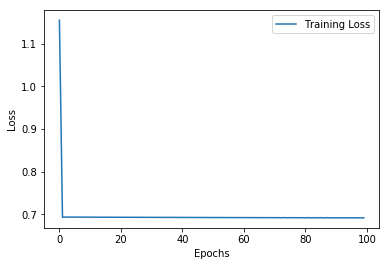

In [20]:
epochs = 100

# Lists to store training loss for plotting
train_loss_history = []

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    deep.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = deep(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))  # Turn logits -> pred probs -> pred labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Optimizer step
    optimizer.step()

    ### Testing
    deep.eval()
    with torch.no_grad():
        # 1. Forward pass
        test_logits = deep(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # 2. Calculate loss/accuracy
        test_loss = loss_fn(test_logits, y_test)
    
    # Print out what's happening every epoch
    print(f"Epoch: {epoch} | Loss: {loss.item():.5f} | Test loss: {test_loss.item():.5f}")

    # Append training loss to the list for plotting
    train_loss_history.append(loss.item())

    # Check for NaN or infinite values in tensors
    if torch.isnan(loss) or torch.isinf(loss):
        print("Training loss is NaN or infinite. Exiting training loop.")
        break

# Plot training loss over epochs
plt.plot(range(epochs), train_loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Set the number of epochs
epochs = 100

# Training loop
for epoch in range(epochs):
    model.train()
    
    # 1. Forward pass (model outputs raw logits)
    y_logits = model(X_train).squeeze()
    # Squeeze to remove extra `1` dimensions; this won't work unless model and data are on the same device 
    y_pred = torch.round(torch.sigmoid(y_logits))  # Turn logits -> pred probs -> pred labels

    loss = criterion(y_logits, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss for every few epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate on test data
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)

print(f'Test Loss: {test_loss.item():.4f}')


Epoch [10/100], Loss: 743.2023
Epoch [20/100], Loss: 740.9802
Epoch [30/100], Loss: 740.6160


Epoch [40/100], Loss: 740.2402
Epoch [50/100], Loss: 739.9799
Epoch [60/100], Loss: 739.7703
Epoch [70/100], Loss: 739.5802
Epoch [80/100], Loss: 739.3683
Epoch [90/100], Loss: 739.2172
Epoch [100/100], Loss: 739.0782


RuntimeError: expected scalar type Long but found Float